In [2]:
source("./libs.R")

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 772 rows [3, 50, 83, 84, 138, 181, 196, 213, 253, 265, 274, 301, 303, 353, 371, 388, 412, 434, 491, 495, ...].”

## data load

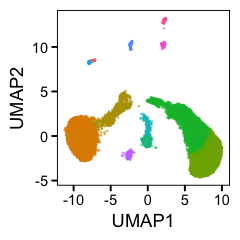

In [3]:
options(repr.plot.width = 2, repr.plot.height = 2)

ggplot(input.umap.res, aes(UMAP1, UMAP2)) + geom_point(aes(color = cluster), size = 0.1, 
    alpha = 0.5) + theme_pubr() + theme(legend.position = "none")

In [21]:
table(input.umap.res %>% filter(barcodes %in% colnames(input.chromVar.jaspar.z)[-1]) %>% 
    pull(cell_type_overall))
table(input.umap.res %>% pull(cell_type_overall))
table(input.umap.res %>% pull(cell_type_overall))%>%as.numeric%>%sum


     acinar       alpha        beta       delta      ductal endothelial 
         46        6217        7598         710          80         118 
      gamma      immune    stellate 
        260         140         128 


     acinar       alpha        beta       delta      ductal endothelial 
         46        6218        7598         710          80         118 
      gamma      immune    stellate 
        260         140         128 

[1] 15298

In [3]:
input.chromVar.jaspar.z.agg <- melt(data.table(assays(input.chromVar.res.list$dev)$z, 
    keep.rownames = T), id = "rn", variable.name = "barcodes", value.name = "zval")
input.chromVar.jaspar.z.agg %>% head(1)

input.chromVar.jaspar.z.agg %>% nrow
input.chromVar.jaspar.z.agg <- input.chromVar.jaspar.z.agg %>% inner_join(input.umap.res) %>% 
    separate(rn, into = c("id", "name"), sep = "_")
input.chromVar.jaspar.z.agg %>% nrow

input.chromVar.jaspar.z.agg %>% head(1)
input.chromVar.jaspar.z.agg %>% select(barcodes, cell_type_overall) %>% unique %>% 
    pull(cell_type_overall) %>% table

range(input.chromVar.jaspar.z.agg$zval, na.rm = T)
input.chromVar.jaspar.z.agg$zval[is.na(input.chromVar.jaspar.z.agg$zval)] <- 0
range(input.chromVar.jaspar.z.agg$zval, na.rm = T)

rn,barcodes,zval
<chr>,<fct>,<dbl>
MA0004.1_Arnt,Islet1fresh_AGACACCTAAGAGGCAAAGGAGTAGGCTC,-1.566904


[1] 8857542

Joining, by = "barcodes"
Warning message:
“Column `barcodes` joining factor and character vector, coercing into character vector”

[1] 8857542

id,name,barcodes,zval,UMAP1,UMAP2,cluster,cell_type_overall,subtype,unique_usable_reads,log_usable_counts,frac_duplicated_reads,frac_mito_reads,frac_promoters_used,frac_reads_in_peaks,frac_reads_in_promoters
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MA0004.1,Arnt,Islet1fresh_AGACACCTAAGAGGCAAAGGAGTAGGCTC,-1.566904,-5.102393,1.38682,alpha_2,alpha,2,6254,7.865955,0.7902986,0.03428042,0.04337516,0.5978574,0.2646306


.
     acinar       alpha        beta       delta      ductal endothelial 
         46        6218        7598         710          80         118 
      gamma      immune    stellate 
        260         140         128 

[1] -20.16193  31.35658

[1] -20.16193  31.35658

In [4]:
ttest.res <- fread("../figures/Fig1/subfigs/fig1E_one_vs_one.csv")
ttest.res %>% head(1)
dim(ttest.res)
ttest.res %>% select(motif, test) %>% unique %>% nrow

rank,motif,id,x,y,test,mean_x,mean_y,enrichedIn,pval,FDR,padj,lfdr,family.id,family.name,class.id,class.name,superclass.id,superclass.name
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>
1,NRL,MA0842.1,beta,delta,beta_vs_delta,-0.1351892,-1.215561,beta,1.907675e-96,1.104544e-93,1.104544e-93,-92.95682,1.1.3,Maf-related,1.1,Basic leucine zipper factors (bZIP),1,Basic domains


[1] 1228   19

[1] 1158

## functions

Joining, by = "barcodes"
Joining, by = "barcodes"


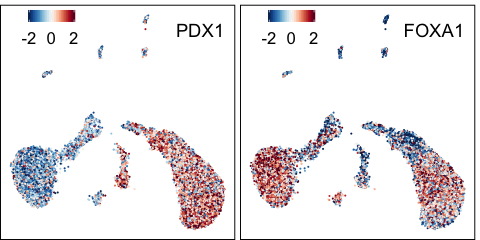

In [7]:
## fun.plot.project.motif from libs.R
options(repr.plot.width = 4, repr.plot.height = 2)
motifs <- c("PDX1", "FOXA1")
ps <- lapply(motifs, function(m) fun.plot.project.motif(m, bks = c(-2, 0, 2), size = 0.25, 
    cls = rev(brewer.pal(n = 11, "RdBu"))) + annotate(geom = "text", x = 10, y = 12, 
    label = m, hjust = 1))
names(ps) <- motifs
ggarrange(plotlist = ps, ncol = 2)

Joining, by = "barcodes"
Joining, by = "barcodes"


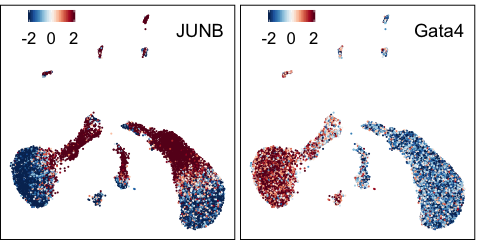

In [50]:
options(repr.plot.width = 4, repr.plot.height = 2)
motifs <- c("JUNB", "Gata4")
ps <- lapply(motifs, function(m) fun.plot.project.motif(m, bks = c(-2, 0, 2), size = 0.25, 
    cls = rev(brewer.pal(n = 11, "RdBu"))) + annotate(geom = "text", x = 10, y = 12, 
    label = m, hjust = 1))
names(ps) <- motifs
ggarrange(plotlist = ps, ncol = 2)

Joining, by = "barcodes"
Joining, by = "barcodes"


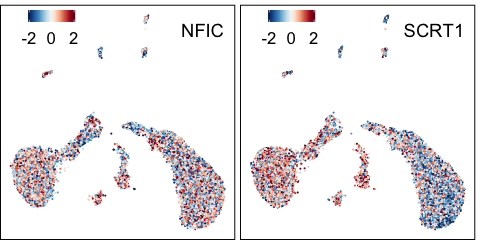

In [51]:
options(repr.plot.width = 4, repr.plot.height = 2)
motifs <- c("NFIC", "SCRT1")
ps <- lapply(motifs, function(m) fun.plot.project.motif(m, bks = c(-2, 0, 2), size = 0.25, 
    cls = rev(brewer.pal(n = 11, "RdBu"))) + annotate(geom = "text", x = 10, y = 12, 
    label = m, hjust = 1))
names(ps) <- motifs
ggarrange(plotlist = ps, ncol = 2)

## ranked bars

rank,motif,id,x,y,test,mean_x,mean_y,enrichedIn,pval,FDR,padj,lfdr
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,NRL,MA0842.1,beta,delta,beta_vs_delta,-0.1351892,-1.215561,beta,1.907675e-96,1.104544e-93,1.104544e-93,-92.95682


[1]  2.016807 92.956817

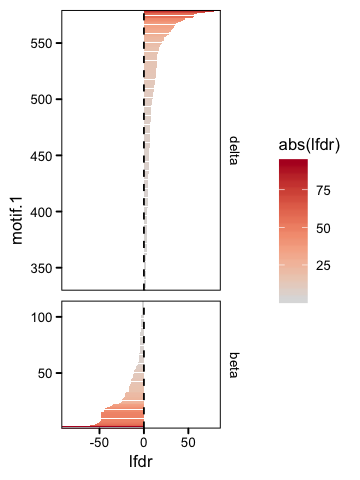

In [12]:
options(repr.plot.width = 3, repr.plot.height = 4)
require(pals)

pd.rank <- ttest.res %>% select(-contains(".")) %>% unique %>% filter(test == "beta_vs_delta") %>% 
    ungroup
nmotifs <- pd.rank %>% nrow
pd.rank %>% head(1)
n_m = 0

pd.rank <- pd.rank %>% mutate(motif.1 = as.numeric(factor(motif, levels = pd.rank$motif)) - 
    n_m, lpadj = ifelse(enrichedIn == "beta", log10(FDR), -log10(FDR))) %>% filter(FDR < 
    0.01) %>% mutate(enrichedIn = factor(enrichedIn, levels = c("delta", "beta")))
pd.rank %>% pull(lpadj) %>% abs %>% range
ggplot(pd.rank) + geom_bar(aes(motif.1, lfdr, fill = abs(lfdr)), stat = "identity") + 
    theme_pubr(base_size = 10) + theme() + coord_flip(expand = F) + scale_fill_gradientn(colours = pal.compress(coolwarm)[7:13]) + 
    scale_x_continuous(breaks = seq(0 - n_m, nmotifs - n_m, 50)) + facet_grid(enrichedIn ~ 
    ., scales = "free_y", space = "free_y") + geom_hline(yintercept = 0, linetype = 2)

ggsave(paste0("../figures/Fig1/subfigs/fig1_one_vs_one.b_d.rankedBar.pdf"), width = 3, 
    height = 4, units = "in", useDingbats = F)
system(paste0("open ../figures/Fig1/subfigs/fig1_one_vs_one.b_d.rankedBar.pdf"))
fwrite(pd.rank %>% select(motif, motif.1, lfdr, enrichedIn), "../figures/Fig1/subfigs/fig1_one_vs_one.b_d.rankedBar.csv")
system( "open ../figures/Fig1/subfigs/fig1_one_vs_one.b_d.rankedBar.csv")

rank,motif,id,x,y,test,mean_x,mean_y,enrichedIn,pval,FDR,padj,lfdr
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
3,MAFG,MA0659.1,alpha,gamma,alpha_vs_gamma,0.3157566,-1.783733,alpha,2.696129e-75,1.561059e-72,1.561059e-72,-71.80658


[1]  2.01081 71.80658

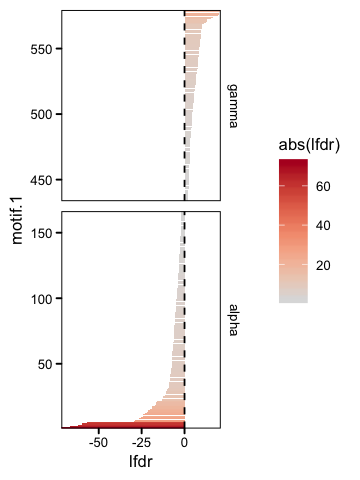

In [17]:
options(repr.plot.width = 3, repr.plot.height = 4)
require(pals)

pd.rank <- ttest.res %>% select(-contains(".")) %>% unique %>% filter(test == "alpha_vs_gamma") %>% 
    ungroup
nmotifs <- pd.rank %>% nrow
pd.rank %>% head(1)
n_m = 0

pd.rank <- pd.rank %>% mutate(motif.1 = as.numeric(factor(motif, levels = pd.rank$motif)) - 
    n_m, lpadj = ifelse(enrichedIn == "alpha", log10(FDR), -log10(FDR))) %>% filter(FDR < 
    0.01) %>% mutate(enrichedIn = factor(enrichedIn, levels = c("gamma", "alpha")))
pd.rank %>% pull(lpadj) %>% abs %>% range
p <- ggplot(pd.rank) + geom_bar(aes(motif.1, lfdr, fill = abs(lfdr)), stat = "identity") + 
    theme_pubr(base_size = 10) + theme() + coord_flip(expand = F) + scale_fill_gradientn(colours = pal.compress(coolwarm)[7:13]) + 
    scale_x_continuous(breaks = seq(0 - n_m, nmotifs - n_m, 50)) + facet_grid(enrichedIn ~ 
    ., scales = "free_y", space = "free_y") + geom_hline(yintercept = 0, linetype = 2)
print(p)
ggsave("../figures/Fig1/subfigs/fig1_one_vs_one.a_g.rankedBar.pdf", width = 3, height = 4, 
    units = "in", useDingbats = F)
system("open ../figures/Fig1/subfigs/fig1_one_vs_one.a_g.rankedBar.pdf")

fwrite(pd.rank %>% select(motif, motif.1, lfdr, enrichedIn), "../figures/Fig1/subfigs/fig1_one_vs_one.a_g.rankedBar.csv")
system("open ../figures/Fig1/subfigs/fig1_one_vs_one.a_g.rankedBar.csv")

### UMAP+violin

In [16]:
p <- plotViolin("Mafb",test_celltypes = c('alpha','gamma'))
p$data%>%head(1)

id,name,barcodes,zval,UMAP1,UMAP2,cluster,cell_type_overall,subtype,unique_usable_reads,log_usable_counts,frac_duplicated_reads,frac_mito_reads,frac_promoters_used,frac_reads_in_peaks,frac_reads_in_promoters
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MA0117.2,Mafb,Islet1fresh_AGACACCTAAGAGGCAAAGGAGTAGGCTC,-0.2966498,-5.102393,1.38682,alpha_2,alpha,2,6254,7.865955,0.7902986,0.03428042,0.04337516,0.5978574,0.2646306


Joining, by = "barcodes"


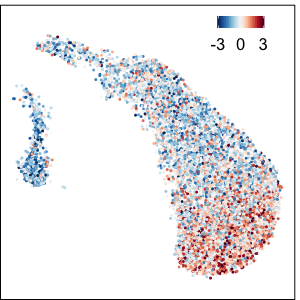

Joining, by = "barcodes"


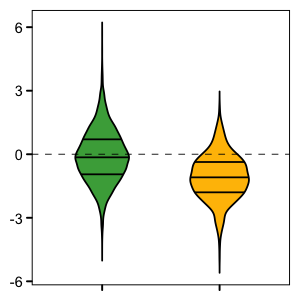

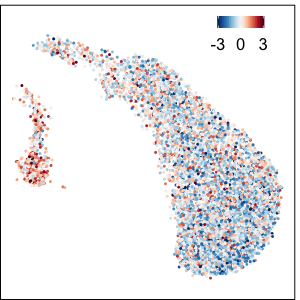

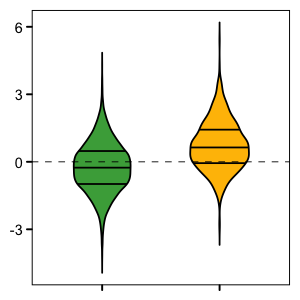

In [18]:
plotViolin <- function(motif = m, test_celltypes = celltype.test) {
    pd <- input.chromVar.jaspar.z.agg %>% filter(name == motif, cell_type_overall %in% 
        test_celltypes)
    pd$cell_type_overall <- factor(pd$cell_type_overall, levels = test_celltypes)
    ggviolin(pd, x = "cell_type_overall", remove = T, width = 0.5, y = "zval", size = 0.5, 
        shape = 16, draw_quantiles = c(0.25, 0.5, 0.75), fill = "cell_type_overall", 
        ylab = "Motif enrichment") + theme_pubr() + ggtitle(motif) + geom_hline(yintercept = 0, 
        linetype = 2, size = 0.25) + theme(legend.position = "none", axis.text.x = element_text(angle = 45, 
        hjust = 1), axis.title.x = element_blank()) + scale_fill_manual(values = cols.celltype)
    
}
options(repr.plot.width = 1.5, repr.plot.height = 2)

plotMotif_bd <- function(m = "TCF7L2") {
    options(repr.plot.width = 2.5, repr.plot.height = 2.5)
    
    p <- fun.plot.project.motif(motif = m, bks = c(-3, 0, 3), size = 0.5, cls = rev(brewer.pal(n = 11, 
        "RdBu")), legend.pos = c(0.8, 0.9)) + coord_cartesian(ylim = c(-5, 5))
    p$data <- p$data %>% filter(cell_type_overall %in% c("beta", "delta"))
    p2 <- plotViolin(m, c("beta", "delta")) + theme(title = element_blank(), axis.text.x = element_blank())
    
    print(p)
    ggsave(paste0("../figures/Fig1/subfigs/fig1_one_vs_one.", m, ".b_d.umap.pdf"), 
        width = 2.5, height = 2.5, units = "in", useDingbats = F)
    system(paste0("open ../figures/Fig1/subfigs/fig1_one_vs_one.", m, ".b_d.umap.pdf"))
    fwrite(p2$data %>% select(UMAP1, UMAP2, zval, cell_type_overall), paste0("../figures/Fig1/subfigs/fig1_one_vs_one.", 
        m, ".b_d.umap.csv"))
    system(paste0("open ../figures/Fig1/subfigs/fig1_one_vs_one.", m, ".b_d.umap.csv"))
    
    print(p2)
    ggsave(paste0("../figures/Fig1/subfigs/fig1_one_vs_one.", m, ".b_d.violin.pdf"), 
        width = 1, height = 1.5, units = "in", useDingbats = F)
    system(paste0("open ../figures/Fig1/subfigs/fig1_one_vs_one.", m, ".b_d.violin.pdf"))
    
    
    #+ annotate(geom = 'text', x = 5, y = 5, label = m) + annotation_custom((p2 + 
    # theme(title = element_blank())) %>% ggplotGrob, -10.2, -2, -7, -1))
    
    # ggsave(paste0('~/Dropbox
    # (UCSD_Epigenomics)/workReports/2019-10_islet_rev/Fig1.rev.candid/Fig1.rev.candid.',
    # m, '.b_d.umap.pdf'), width = 2.5, height = 2.5, units = 'in', useDingbats = F)
}
plotMotif_bd("Mafb")
plotMotif_bd("SCRT1")

Joining, by = "barcodes"


          UMAP1     UMAP2
[1,] -11.186029 -2.854394
[2,]  -1.206101  5.101148


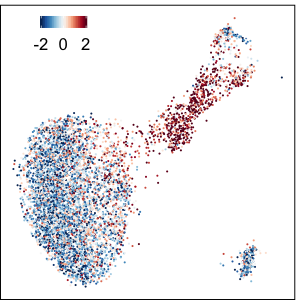

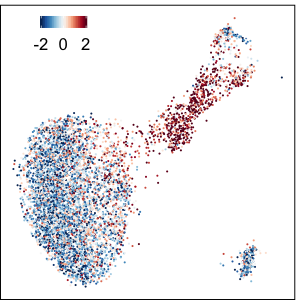

Joining, by = "barcodes"


          UMAP1     UMAP2
[1,] -11.186029 -2.854394
[2,]  -1.206101  5.101148


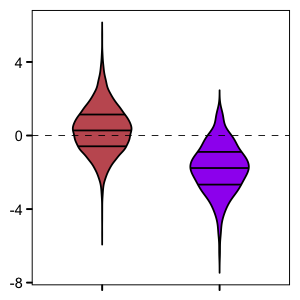

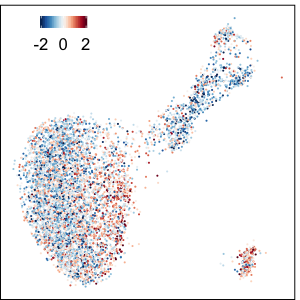

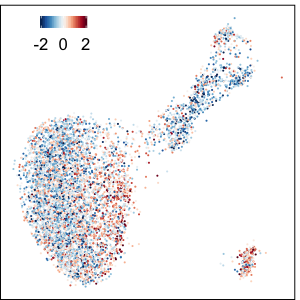

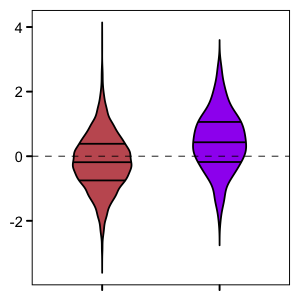

In [22]:
plotMotif_ag <- function(m = "TCF7L2") {
    options(repr.plot.width = 2.5, repr.plot.height = 2.5)
    
    p <- fun.plot.project.motif(motif = m, bks = c(-2, 0, 2), size = 0.25, cls = rev(brewer.pal(n = 11, 
        "RdBu")))
    p$data <- p$data %>% filter(cell_type_overall %in% c("alpha", "gamma"))
    p$data %>% select(UMAP1, UMAP2) %>% apply(2, range) %>% print
    
    p2 <- plotViolin(m, c("alpha", "gamma")) + theme(title = element_blank(), axis.text.x = element_blank())
    
    print(p)
    print(p)
    
    ggsave(paste0("../figures/Fig1/subfigs/fig1_one_vs_one.", m, ".a_g.umap.pdf"), 
        width = 2.5, height = 2.5, units = "in", useDingbats = F)
    system(paste0("open ../figures/Fig1/subfigs/fig1_one_vs_one.", m, ".a_g.umap.pdf"))
    fwrite(p2$data %>% select(UMAP1, UMAP2, zval, cell_type_overall), paste0("../figures/Fig1/subfigs/fig1_one_vs_one.", 
        m, ".a_g.umap.csv"))
    system(paste0("open ../figures/Fig1/subfigs/fig1_one_vs_one.", m, ".a_g.umap.csv"))
    
    print(p2)
    ggsave(paste0("../figures/Fig1/subfigs/fig1_one_vs_one.", m, ".a_g.violin.pdf"), 
        width = 1, height = 1.5, units = "in", useDingbats = F)
    system(paste0("open ../figures/Fig1/subfigs/fig1_one_vs_one.", m, ".a_g.violin.pdf"))
}
plotMotif_ag("MAFG")
plotMotif_ag("ZNF263")

### old version

Joining, by = "barcodes"


          UMAP1     UMAP2
[1,] -11.819448 -5.073896
[2,]   8.179459  6.196858


Joining, by = "barcodes"


          UMAP1     UMAP2
[1,] -11.819448 -5.073896
[2,]   8.179459  6.196858


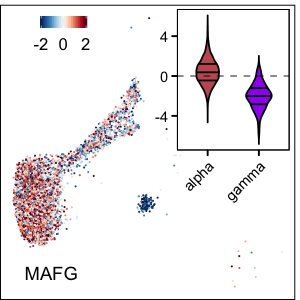

Joining, by = "barcodes"


          UMAP1     UMAP2
[1,] -11.819448 -5.073896
[2,]   8.179459  6.196858


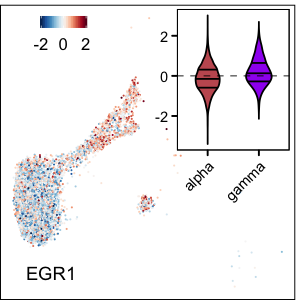

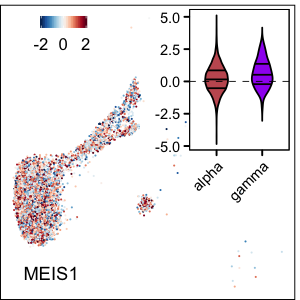

In [71]:
plotMotif_ag <- function(m = "TCF7L2") {
    options(repr.plot.width = 2.5, repr.plot.height = 2.5)
    
    p <- fun.plot.project.motif(motif = m, bks = c(-2, 0, 2), size = 0.25, cls = rev(brewer.pal(n = 11, 
        "RdBu")))
    p$data <- p$data %>% filter(cell_type_overall %in% c("alpha", "gamma"))
    p$data %>% select(UMAP1, UMAP2) %>% apply(2, range) %>% print
    
    p2 <- plotViolin(m, c("alpha", "gamma"))
    
    print(p + annotate(geom = "text", x = -9, y = -4.5, label = m) + annotation_custom((p2 + 
        theme(title = element_blank(), panel.background = element_rect(fill = "white"))) %>% 
        ggplotGrob, -2, 9.5, -2, 7))
    
    ggsave(paste0("~/Dropbox (UCSD_Epigenomics)/workReports/2019-10_islet_rev/Fig1.rev.candid/Fig.1.", 
        m, ".a_g.umap.pdf"), width = 2.5, height = 2.5, units = "in", useDingbats = F)
}
plotMotif_ag("MAFG")
plotMotif_ag("EGR1")
plotMotif_ag("MEIS1")